# Indian Restaurant Analysis

## Data Cleaning

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, to_date, date_format, hour, desc, avg, weekofyear
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
spark = SparkSession.builder.appName("RestaurantAnalysis").getOrCreate()


In [0]:
res_1_orders = spark.read.csv("/FileStore/tables/restaurant_1_orders-2.csv", header=True, inferSchema=True)

In [0]:
res_1_prod_price = spark.read.csv("/FileStore/tables/restaurant_1_products_price.csv", header=True, inferSchema=True)

In [0]:
res_2_orders = spark.read.csv("/FileStore/tables/restaurant_2_orders.csv", header=True, inferSchema=True)

In [0]:
res_2_prod_price = spark.read.csv("/FileStore/tables/restaurant_2_products_price.csv", header=True, inferSchema=True)

In [0]:
display(res_2_prod_price)

Item Name,Product Price
Onion Chutney,0.5
Mint Sauce,0.5
Mango Chutney,0.5
Red Sauce,0.5
Lime Pickle,0.5
Plain Papadum,0.8
Spicy Papadum,0.8
Chapati,1.95
Puree,1.95
Dahi,1.95


In [0]:
def count_missing_values(df):
    return df.select([
        count(when(col(c).isNull(), c)).alias(c)
        for c in df.columns
    ])

missing_values_r1 = count_missing_values(res_1_orders)
missing_values_r2 = count_missing_values(res_2_orders)
missing_values_r1_proc_price = count_missing_values(res_1_prod_price)
missing_values_r2_prod_price = count_missing_values(res_2_prod_price)

In [0]:
missing_values_r1.show()

+------------+----------+---------+--------+-------------+--------------+
|Order Number|Order Date|Item Name|Quantity|Product Price|Total products|
+------------+----------+---------+--------+-------------+--------------+
|           0|         0|        0|       0|            0|             0|
+------------+----------+---------+--------+-------------+--------------+



In [0]:
missing_values_r2.show()

+--------+----------+---------+--------+-------------+--------------+
|Order ID|Order Date|Item Name|Quantity|Product Price|Total products|
+--------+----------+---------+--------+-------------+--------------+
|       0|         0|        0|       0|            0|             0|
+--------+----------+---------+--------+-------------+--------------+



In [0]:
missing_values_r1_proc_price.show()

+---------+-------------+
|Item Name|Product Price|
+---------+-------------+
|        0|            0|
+---------+-------------+



In [0]:
missing_values_r2_prod_price.show()

+---------+-------------+
|Item Name|Product Price|
+---------+-------------+
|        0|            0|
+---------+-------------+



In [0]:
duplicate_rows_count = res_1_orders.count() - res_1_orders.distinct().count()
duplicate_rows_count

Out[77]: 97

In [0]:
duplicate_rows_count = res_2_orders.count() - res_2_orders.distinct().count()
duplicate_rows_count

Out[78]: 178

In [0]:
duplicate_rows_count = res_1_prod_price.count() - res_1_prod_price.distinct().count()
duplicate_rows_count

Out[79]: 0

In [0]:
duplicate_rows_count = res_2_prod_price.count() - res_2_prod_price.distinct().count()
duplicate_rows_count

Out[80]: 0

In [0]:
res_1_orders = res_1_orders.dropDuplicates()

In [0]:
res_2_orders = res_2_orders.dropDuplicates()

In [0]:
duplicate_rows_count = res_1_orders.count() - res_1_orders.distinct().count()
duplicate_rows_count

Out[83]: 0

In [0]:
duplicate_rows_count = res_2_orders.count() - res_2_orders.distinct().count()
duplicate_rows_count

Out[84]: 0

In [0]:
display(res_1_orders)

Order Number,Order Date,Item Name,Quantity,Product Price,Total products
15979,26/07/2019 19:42,Mango Chutney,1,0.5,6
15934,23/07/2019 19:54,Mango Chutney,2,0.5,3
15915,21/07/2019 18:55,Mint Sauce,1,0.5,5
15633,05/07/2019 17:56,Mango Chutney,2,0.5,7
14310,13/04/2019 19:22,Onion Chutney,2,0.5,10
13615,01/03/2019 18:11,Mango Chutney,1,0.5,9
13520,22/02/2019 18:33,Mint Sauce,1,0.5,9
13179,01/02/2019 17:12,Mango Chutney,1,0.5,8
12634,23/12/2018 19:44,Onion Chutney,1,0.5,14
12595,22/12/2018 17:36,Mint Sauce,2,0.5,9


## Data Visualisations

In [0]:
# Convert Order Date to Date Format
res_1_orders = res_1_orders.withColumn("Order Date", to_date(col("Order Date"), "MM/dd/yyyy HH:mm"))
res_2_orders = res_2_orders.withColumn("Order Date", to_date(col("Order Date"), "MM/dd/yyyy HH:mm"))

In [0]:
res_1_orders = res_1_orders.withColumn("Order Week", weekofyear(col("Order Date")))
res_2_orders = res_2_orders.withColumn("Order Week", weekofyear(col("Order Date")))

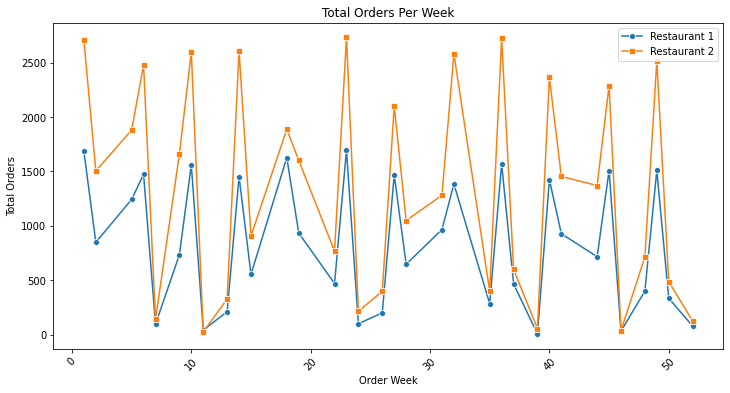

In [0]:
total_orders_r1 = res_1_orders.groupBy("Order Week").agg(count("Order Date").alias("Total Orders"))
total_orders_r2 = res_2_orders.groupBy("Order Week").agg(count("Order Date").alias("Total Orders"))

total_orders_r1_pd = total_orders_r1.toPandas().sort_values("Order Week")
total_orders_r2_pd = total_orders_r2.toPandas().sort_values("Order Week")

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_orders_r1_pd, x="Order Week", y="Total Orders", label="Restaurant 1", marker="o")
sns.lineplot(data=total_orders_r2_pd, x="Order Week", y="Total Orders", label="Restaurant 2", marker="s")
plt.xlabel("Order Week")
plt.ylabel("Total Orders")
plt.title("Total Orders Per Week")
plt.legend()
plt.xticks(rotation=45)
plt.show()

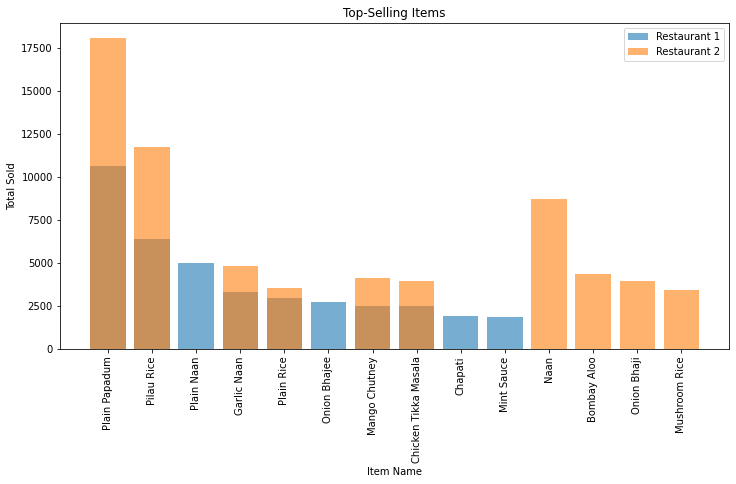

In [0]:
best_sellers_r1 = res_1_orders.groupBy("Item Name").agg(sum("Quantity").alias("Total Sold")).orderBy(desc("Total Sold"))
best_sellers_r2 = res_2_orders.groupBy("Item Name").agg(sum("Quantity").alias("Total Sold")).orderBy(desc("Total Sold"))

# Convert to Pandas for Visualization
best_sellers_r1_pd = best_sellers_r1.toPandas().head(10)
best_sellers_r2_pd = best_sellers_r2.toPandas().head(10)

# Plot Best Sellers
plt.figure(figsize=(12, 6))
plt.bar(best_sellers_r1_pd["Item Name"], best_sellers_r1_pd["Total Sold"], label="Restaurant 1", alpha=0.6)
plt.bar(best_sellers_r2_pd["Item Name"], best_sellers_r2_pd["Total Sold"], label="Restaurant 2", alpha=0.6)
plt.xlabel("Item Name")
plt.ylabel("Total Sold")
plt.title("Top-Selling Items")
plt.legend()
plt.xticks(rotation=90)
plt.show()

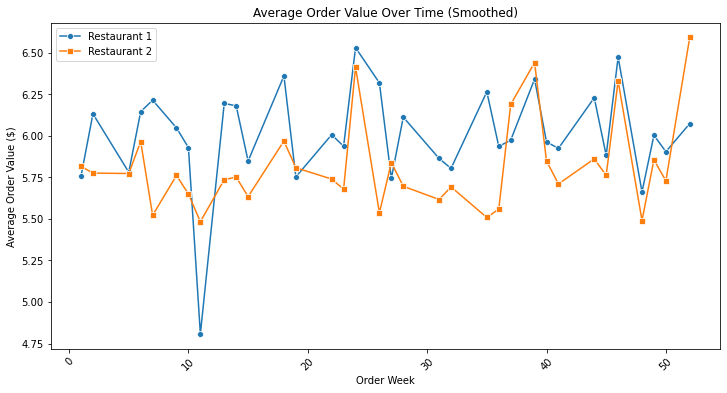

In [0]:
avg_order_value_r1 = res_1_orders.groupBy("Order Week").agg(avg(col("Product Price") * col("Quantity")).alias("Average Order Value"))
avg_order_value_r2 = res_2_orders.groupBy("Order Week").agg(avg(col("Product Price") * col("Quantity")).alias("Average Order Value"))

# Convert to Pandas for Visualization
avg_order_value_r1_pd = avg_order_value_r1.toPandas().sort_values("Order Week")
avg_order_value_r2_pd = avg_order_value_r2.toPandas().sort_values("Order Week")

# Plot Average Order Value (Smoothed by Weekly Aggregation)
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_order_value_r1_pd, x="Order Week", y="Average Order Value", label="Restaurant 1", marker="o")
sns.lineplot(data=avg_order_value_r2_pd, x="Order Week", y="Average Order Value", label="Restaurant 2", marker="s")
plt.xlabel("Order Week")
plt.ylabel("Average Order Value ($)")
plt.title("Average Order Value Over Time (Smoothed)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

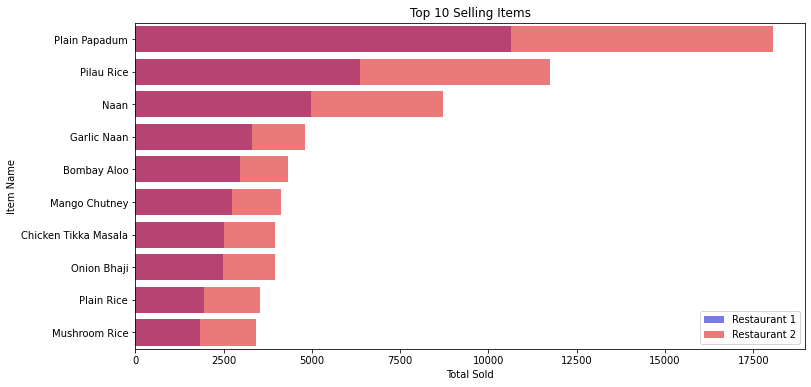

In [0]:
best_sellers_r1 = res_1_orders.groupBy("Item Name").agg(sum("Quantity").alias("Total Sold")).orderBy(desc("Total Sold"))
best_sellers_r2 = res_2_orders.groupBy("Item Name").agg(sum("Quantity").alias("Total Sold")).orderBy(desc("Total Sold"))

best_sellers_r1_pd = best_sellers_r1.toPandas().head(10)
best_sellers_r2_pd = best_sellers_r2.toPandas().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=best_sellers_r1_pd, x="Total Sold", y="Item Name", color="blue", label="Restaurant 1", alpha=0.6)
sns.barplot(data=best_sellers_r2_pd, x="Total Sold", y="Item Name", color="red", label="Restaurant 2", alpha=0.6)
plt.xlabel("Total Sold")
plt.ylabel("Item Name")
plt.title("Top 10 Selling Items")
plt.legend()
plt.show()

In [0]:
summary_r1 = res_1_orders.agg(
    sum(col("Product Price") * col("Quantity")).alias("Total Revenue"),
    count("Order Number").alias("Total Orders")
).toPandas()

summary_r2 = res_2_orders.agg(
    sum(col("Product Price") * col("Quantity")).alias("Total Revenue"),
    count("Order ID").alias("Total Orders")
).toPandas()

# Print Summary
print("Restaurant 1 Summary:")
print(summary_r1)
print("\nRestaurant 2 Summary:")
print(summary_r2)

Restaurant 1 Summary:
   Total Revenue  Total Orders
0       445791.5         74721

Restaurant 2 Summary:
   Total Revenue  Total Orders
0      685613.75        119005
